# Define Global Variables and Helper Functions

In [1]:
# Global Imports
import numpy as np
from sklearn import metrics
import pandas as pd
import os
import matplotlib.pyplot as plt

# Helpers
TRAIN_FILE = "resources/train/train.csv"
TEST_FILE = "resources/test/test_with_solutions.csv"
BAD_WORDS_FILE = "resources/badwords.txt"
NO_INSULT = 'NoInsult'
INSULT = 'Insult'

# Comments preprocessing
def preprocess_comment(comment):
    import re
    comment = comment.strip().strip('"')
    comment = comment.replace('_', ' ')
    comment = comment.replace("\\\\", "\\")
    comment = comment.replace('\\n', ' ')
    comment = comment.replace('\\n', ' ')
    comment = comment.lower()
    comment = re.sub(r'^https?:\/\/.*[\r\n]*', 'URL', comment, flags=re.MULTILINE)
    comment = comment.encode('utf-8').decode('unicode-escape')
    return comment

# Predictions Accuracy Report
def predictions_report(pred, ground_truth):
    print("Accuracy: " + str(np.mean(pred == ground_truth)) + "\n")
    print(metrics.classification_report(ground_truth, pred,
        target_names=['NoInsult', 'Insult']))

# Predictions Proba Accuracy Report
def predictions_report_proba(pred, ground_truth, threshold=0.5):
    # Extract Plain Estimations

    labels = []
    for index, prediction in enumerate(pred):
        if isinstance(prediction, list) or type(prediction) is np.ndarray:
            if len(prediction) == 1:
                if prediction[0] >= threshold:
                    labels.append(1)
                else:
                    labels.append(0)
            else:
                if prediction[0] > prediction[1]:
                    labels.append(0)
                else:
                    labels.append(1)
        else:
            if prediction >= threshold:
                labels.append(1)
            else:
                labels.append(0)

    labels = np.array(labels)

    print("Accuracy: " + str(np.mean(labels==ground_truth)) + "\n")
    print(metrics.classification_report(ground_truth, labels,
        target_names=['NoInsult', 'Insult']))

# Load Bad Words Helper
def load_bad_words(badwords_file):
    with open(badwords_file) as f:
        lines = f.readlines()
        return [badword[:-1] for badword in lines]

# Load Resources

In [93]:
# Load list of badwords
badwords = load_bad_words(BAD_WORDS_FILE)

# Load Train Data
train_df = pd.read_csv(TRAIN_FILE)

# Load Test Data
test_df = pd.read_csv(TEST_FILE)

raw_train_comments = train_df['Comment'].apply(lambda comment: preprocess_comment(comment))
raw_test_comments = test_df['Comment'].apply(lambda comment: preprocess_comment(comment))

<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\ '
  comment = comment.encode('utf-8').decode('unicode-escape')
<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\p'
  comment = comment.encode('utf-8').decode('unicode-escape')
<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\/'
  comment = comment.encode('utf-8').decode('unicode-escape')


In [3]:
print(len(train_df.index))
train_df.head()

3947


,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


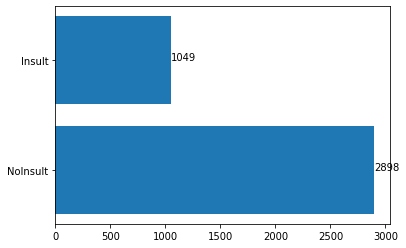

In [4]:
# Categories Balance
x = [NO_INSULT, INSULT]
ni_count, icount = train_df['Insult'].value_counts()
y = [ni_count, icount]
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [5]:
train_df['Insult'].value_counts(normalize=True)

0    0.734229
1    0.265771
Name: Insult, dtype: float64

In [6]:
print(len(test_df.index))
test_df.head()

2647


,Insult,Date,Comment,Usage
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest


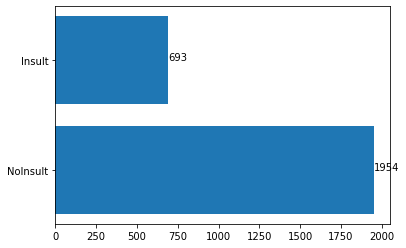

In [7]:
ni_count, icount = test_df['Insult'].value_counts()
y = [ni_count, icount]
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [8]:
# Test Dataset Balance
test_df['Insult'].value_counts(normalize=True)

0    0.738194
1    0.261806
Name: Insult, dtype: float64

In [117]:
train_labels = train_df["Insult"]
train_comments = train_df["Comment"]

In [10]:
test_labels = test_df["Insult"]
test_comments = test_df["Comment"]

In [85]:
assert len(train_labels) == len(train_comments) == 3947

# NLTK: Corpus Stats

## Raw Corpus

First, let's take a look to the Frequency Distribution and TF-IDF distribution of the training set without any preprocessing.

Note: the tokenizer applied remove stopwords, normalize the text to lowercase and filter tokens of size < 3 characters

In [12]:
from feature_extraction import corpus_stats, tf_idf_stats

corpus_stats(train_comments)

Number of Words: 73786
Number of unique words: 16372
[   ('xa0', 1223),
    ('like', 718),
    ('xc2', 615),
    ('...', 437),
    ('people', 419),
    ('.\\\\', 415),
    ('get', 398),
    ('would', 371),
    ('one', 360),
    ('know', 328),
    ('think', 302),
    ("\\\\'", 263),
    ('://', 245),
    ('fuck', 242),
    ('x80', 224),
    ('right', 223),
    ('time', 219),
    ('xe2', 213),
    ('make', 211),
    ('good', 207)]


In [13]:
tf_idf_stats(train_comments)


Number of Features: 3820

Scores for comment: 0
dad                  0.8535369792459815
fuck                 0.521032268731645



Scores for comment: 1
oranges              0.5306263581464218
apples               0.5197044492665618
understand           0.36515999718423015
point                0.34980838586743224
really               0.29286527905890025
don                  0.24152415100169672
xa0                  0.22029806147740302



Scores for comment: 2
xc2                  0.3201457437837055
inadvertently        0.29957606737309345
damage               0.2911085231656127
regard               0.2911085231656127
canadians            0.2841900357926315
mail                 0.2841900357926315
perfect              0.25788744107674183
daughter             0.24941989686926105
proof                0.23850333373383326
son                  0.23003578952635248
xa0the               0.22854749591213686
idea                 0.21950060269617008
kill                 0.21126373775810095
sorry    

## Pre-process comments

In [14]:
train_comments = train_comments.apply(lambda comment: preprocess_comment(comment))
corpus_stats(train_comments)

<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\ '
  comment = comment.encode('utf-8').decode('unicode-escape')


Number of Words: 67951
Number of unique words: 15294
[   ('like', 722),
    ('...', 552),
    ('people', 426),
    ('get', 409),
    ('would', 375),
    ('one', 371),
    ('know', 328),
    ('think', 305),
    ('fuck', 251),
    ('right', 225),
    ('time', 219),
    ('....', 212),
    ('make', 212),
    ('good', 210),
    ('see', 209),
    ('really', 195),
    ('back', 191),
    ('even', 189),
    ('say', 183),
    ('way', 182)]


In [15]:
tf_idf_stats(train_comments)


Number of Features: 3682

Scores for comment: 0
dad                  0.8556854567153133
fuck                 0.5174962793739737



Scores for comment: 1
oranges              0.5445066852844984
apples               0.5332990769366469
understand           0.3735486785429875
point                0.35802065834828095
really               0.300104678423663
don                  0.2476375156592591



Scores for comment: 2
inadvertently        0.3093882858732369
regard               0.3006433984365323
canadians            0.2934983051454301
damage               0.2934983051454301
mail                 0.2874572148453
perfect              0.2663342036718874
daughter             0.25758931623518283
majority             0.24631519548944691
proof                0.24258003581733398
son                  0.2360332673464672
idea                 0.22552013195772022
unless               0.22220636897468896
kill                 0.21723903117040777
sorry                0.2104062065791996
wrong             

In [16]:
test_comments = test_comments.apply(lambda comment: preprocess_comment(comment))

<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\ '
  comment = comment.encode('utf-8').decode('unicode-escape')
<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\p'
  comment = comment.encode('utf-8').decode('unicode-escape')
<ipython-input-1-e6d58d29dccd>:25: DeprecationWarning: invalid escape sequence '\/'
  comment = comment.encode('utf-8').decode('unicode-escape')


In [17]:
print(len(train_comments), len(test_comments))

3947 2647


## Replace Insults

We are going to replace any appearance of an insult with a 'fakeinsult' keyword. The intention of this is to concentrate the frequency of any insult into the same token

In [18]:
from feature_extraction import replace_badwords

train_comments = train_comments.apply(lambda comment: replace_badwords(comment, badwords))
test_comments = test_comments.apply(lambda comment: replace_badwords(comment, badwords))

corpus_stats(train_comments)

Number of Words: 68944
Number of unique words: 14893
[   ('fakeinsult', 3526),
    ('like', 722),
    ('...', 552),
    ('people', 426),
    ('get', 409),
    ('would', 375),
    ('one', 371),
    ('know', 328),
    ('think', 305),
    ('right', 225),
    ('time', 219),
    ('ing', 219),
    ('....', 212),
    ('make', 212),
    ('good', 210),
    ('see', 209),
    ('really', 195),
    ('back', 191),
    ('even', 189),
    ('say', 183)]


**Let's check which percentage of comments of each class contains an insult**

In [19]:
train_df['Comment'] = train_comments
train_df[train_df['Comment'].str.contains('fakeinsult')]['Insult'].value_counts(normalize=True)

0    0.563824
1    0.436176
Name: Insult, dtype: float64

# A First Attempt. Naive Classifier using insult presence

As baseline, we are going to use a naive classifier which will classify a comment as offensive if the comment contains an insult keyword


Naive Model Result

Accuracy: 0.6720816018133736

              precision    recall  f1-score   support

    NoInsult       0.88      0.64      0.74      1954
      Insult       0.43      0.76      0.55       693

    accuracy                           0.67      2647
   macro avg       0.65      0.70      0.65      2647
weighted avg       0.76      0.67      0.69      2647



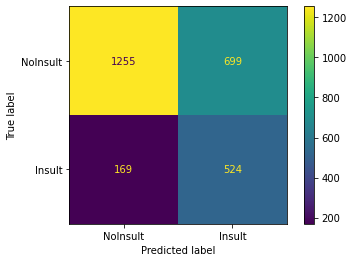

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.base import is_classifier
from training import NaiveClassifier
naive_classifier = NaiveClassifier(badwords)
naive_predictions = naive_classifier.predict(test_comments)
print("\nNaive Model Result\n")
predictions_report(naive_predictions, test_labels)
plot_confusion_matrix(naive_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

As suspected from the outcome of the previous section, there is a huge number of false positives (35,7%) for NoInsult class as many comments containing insults keywords are not really offenses to a particular user. We will need to work that out in the following approaches

# A Simple TF-IDF based classifier


TF-IDF Model Result

Accuracy: 0.8413298073290517

              precision    recall  f1-score   support

    NoInsult       0.83      0.98      0.90      1954
      Insult       0.90      0.44      0.59       693

    accuracy                           0.84      2647
   macro avg       0.87      0.71      0.75      2647
weighted avg       0.85      0.84      0.82      2647



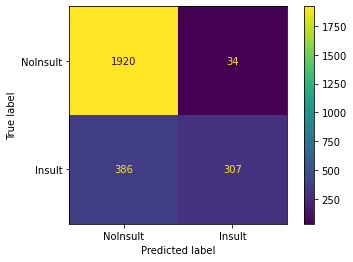

In [21]:
from training import train_tfidf
tf_idf_classifier = train_tfidf(train_comments, train_labels)
predictions = tf_idf_classifier.predict(test_comments)
print("\nTF-IDF Model Result\n")
predictions_report(predictions, test_labels)
plot_confusion_matrix(tf_idf_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

Using a simple TF-IDF based classifier (using stochastic gradient descent estimator) improves the global accuracy a lot and, in particular, the model seems to fix the NoInsult category prediction. But now we have more than 50% of false negatives for Insult category.

## Working with unbalanced training sets

Following https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html we are going to try to tweak the SGD classifier by assigning different weights to each class. Most of the models in scikit-learn have a parameter class_weight. This parameter will affect the computation of the loss in linear model or the criterion in the tree-based model to penalize differently a false classification from the minority and majority class.


TF-IDF Model Result

Accuracy: 0.8367963732527389

              precision    recall  f1-score   support

    NoInsult       0.89      0.89      0.89      1954
      Insult       0.69      0.70      0.69       693

    accuracy                           0.84      2647
   macro avg       0.79      0.79      0.79      2647
weighted avg       0.84      0.84      0.84      2647



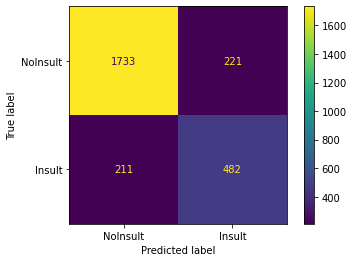

In [22]:
tf_idf_classifier = train_tfidf(train_comments, train_labels, class_weight={0: 1, 1: 2})
predictions = tf_idf_classifier.predict(test_comments)
print("\nTF-IDF Model Result\n")
predictions_report(predictions, test_labels)
plot_confusion_matrix(tf_idf_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

# A Custom Classifier

We can continue playing with the class weights and other classifier's parameters, but eventually we will realize that we need to capture more semantics of the problem in the shape of features. We need specific features to capture when a comment is being offensive for another user.

### A grammar to detect insults to another user

In [23]:
pd.set_option('display.max_colwidth', -1)
train_df[train_df['Insult'] == 1].head(20)

<ipython-input-23-be54043d5dc4>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Insult,Date,Comment
0,1,20120618192155Z,you fakeinsult your dad.
7,1,NaN,shut the fakeinsult up. you and the rest of your fakeinsult got friends should be burned at the stake
8,1,20120502173553Z,either you are fake or extremely fakeinsult ...maybe both...
9,1,20120620160512Z,that you are an fakeinsult who understands neither taxation nor women's health.
15,1,20120611090207Z,for some reason u sound fakeinsult ed. lol. fakeinsult . where u been negro
16,1,20120320162532Z,you with the 'racist' screen name you are a pieceof fakeinsult ..........
18,1,20120320075347Z,your such a fakeinsult head...
19,1,20120320203947Z,your a fakeinsult go post your head up your #%&*
34,1,20120515132156Z,"allinit123, your hypocrisy is sickening, you ignorant fakeinsult ."
37,1,20120620161958Z,i can't believe the fakeinsult people on this site that have no idea what is going on. you fakeinsult s. you are all useful fakeinsult s. they are hiding the truth because you fakeinsult s who protect him would look like the useful fakeinsult s you are.


In [24]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern1 = [{"LEMMA": "-PRON-", "LOWER": {"IN": ["you", "your"]}},
            {"LEMMA": {"IN": ["be", "sound"]}},{"OP": "*", "LENGTH": {"<=": 10}},
            {"LOWER": "fakeinsult"}]
matcher.add("insult1", None, pattern1)

pattern2 = [{"LEMMA": "-PRON-", "LOWER": {"IN": ["you", "your"]}},
            {"OP": "*", "LENGTH": {"<=": 4}},
            {"LOWER": "fakeinsult"}]
matcher.add("insult2", None, pattern2)

doc = nlp("Either you are fake or extremely fakeinsult...maybe both...")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)
    
doc = nlp("your such a  fakeinsult head...")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)


7732708342930407699 insult1 1 7 you are fake or extremely fakeinsult
15011685821042383993 insult2 0 5 your such a  fakeinsult


In [25]:
insults = train_df[train_df['Insult'] == 1]['Comment']
total_matches = 0
for insult in insults:
    doc = nlp(insult)
    matches = matcher(doc)
    if len(matches) > 0:
        total_matches += 1
        
print("Total offensive comments %d" % len(insults))
print("Total with pattern %d" % total_matches)

Total offensive comments 1049
Total with pattern 463


### Custom Features

- **n_words**: total number of words (tokens) in the comment
- **n_chars**: total number of characters in the comment
- **n_dwords**: total number of words in the comment that appears in an English dictionary
- **you_re**: number of insults patterns matches found in the comment
- **!**: number of exclamation symbols
- **allcaps**: number of uppercase characters
- **@**: number of 'addressing' symbols
- **bad_ratio**: ratio of insults used in the comment
- **n_bad**: number of insults in the comment
- **capsratio**: ratio of uppercased characters
- **dicratio**: ratio of dictionary words in the comment
- **sent**: lexicon sentiment score



Custom Model Result

Accuracy: 0.8160181337363053

              precision    recall  f1-score   support

    NoInsult       0.82      0.95      0.88      1954
      Insult       0.77      0.43      0.55       693

    accuracy                           0.82      2647
   macro avg       0.80      0.69      0.72      2647
weighted avg       0.81      0.82      0.80      2647



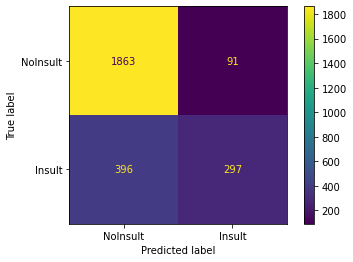

In [26]:
from training import train_custom
custom_classifier = train_custom(train_comments, train_labels)
predictions = custom_classifier.predict(test_comments)
print("\nCustom Model Result\n")
predictions_report(predictions, test_labels)
plot_confusion_matrix(custom_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

# Ensemble Voting Classifier

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

We are going to combine the TF-IDF classifier and the custom classifier using a majority vote classifier. Most of the ensemble methods build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. In this case, we need to combine estimators of different nature. Sklearn [Voting classifier](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier) can help in this situation. The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.


Majority Vote Model Result

Accuracy: 0.8209293539856442

              precision    recall  f1-score   support

    NoInsult       0.84      0.94      0.89      1954
      Insult       0.73      0.50      0.59       693

    accuracy                           0.82      2647
   macro avg       0.79      0.72      0.74      2647
weighted avg       0.81      0.82      0.81      2647



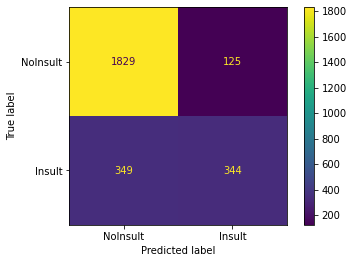

In [27]:
from training import train_assembling_voting
voting_classifier = train_assembling_voting(train_comments, train_labels)
predictions = voting_classifier.predict_proba(test_comments)
print("\nMajority Vote Model Result\n")
predictions_report_proba(predictions, test_labels)
plot_confusion_matrix(voting_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

# Feature Union

To finish with classic estimators based solutions, we are going to make a final attempt by merging the features for both classifiers making use of sklearn [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html). This estimator applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.


Feature Union Model Result

Accuracy: 0.8466188137514167

              precision    recall  f1-score   support

    NoInsult       0.86      0.95      0.90      1954
      Insult       0.79      0.56      0.66       693

    accuracy                           0.85      2647
   macro avg       0.83      0.75      0.78      2647
weighted avg       0.84      0.85      0.84      2647



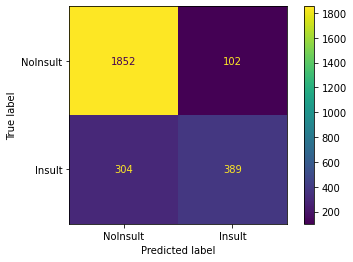

In [28]:
from training import train_feature_union
fu_classifier = train_feature_union(train_comments, train_labels)
predictions = fu_classifier.predict(test_comments)
print("\nFeature Union Model Result\n")
predictions_report(predictions, test_labels)
plot_confusion_matrix(fu_classifier, test_comments, test_labels, display_labels=[NO_INSULT, INSULT])
plt.show()

# Word Embeddings

Word Embedding is the collective name for feature learning techniques where words from the vocabulary are mapped to vectors of real numbers. These vectors are calculated from the probability distribution for each word appearing before or after another. To put it another way, words of the same context usually appear together in the corpus, so they will be close in the vector space as well.

In [29]:
import gensim
from feature_extraction import word2vec_model, tokenize_document
raw_tokenized_corpus = [tokenize_document(comment) for comment in raw_train_comments]
dim = 300
max_len = 15
raw_w2v_model = word2vec_model(raw_tokenized_corpus, n_dim=dim)

In [30]:
print(raw_w2v_model.wv.similarity('retarded', 'loser'))
print(raw_w2v_model.wv.most_similar('retarded', topn=20))

0.99965227
[('being', 0.9999071955680847), ('too', 0.9999014735221863), ('someone', 0.9999005794525146), ('....', 0.9999004006385803), ('stop', 0.9998997449874878), ('dont', 0.9998990893363953), ('mean', 0.9998983144760132), ('little', 0.9998980760574341), ('should', 0.9998977184295654), ('make', 0.9998974800109863), ('still', 0.9998961687088013), ('bitch', 0.9998961687088013), ('point', 0.9998945593833923), ('ass', 0.9998944997787476), ('any', 0.999894380569458), ('yourself', 0.9998937845230103), ('going', 0.9998934268951416), ('better', 0.9998930096626282), ('give', 0.9998929500579834), ('never', 0.9998925924301147)]


In [31]:
tokenized_corpus = [tokenize_document(comment) for comment in train_comments]
test_tokenized_corpus = [tokenize_document(comment) for comment in test_comments]
w2v_model = word2vec_model(tokenized_corpus, n_dim=dim)
w2v_model.wv.most_similar('fakeinsult', topn=20)

[('know', 0.999808669090271),
 ('are', 0.9997797012329102),
 ('don', 0.9997004270553589),
 ('ing', 0.9995821118354797),
 ('like', 0.9995772838592529),
 ('your', 0.9995105266571045),
 ('what', 0.9994930624961853),
 ('just', 0.9994739890098572),
 ('understand', 0.9993782043457031),
 ('can', 0.9993021488189697),
 ('how', 0.9992895722389221),
 ('think', 0.9992784261703491),
 ('people', 0.9992203712463379),
 ('and', 0.9992198944091797),
 ('because', 0.9992059469223022),
 ('get', 0.9992001056671143),
 ('you', 0.9991925954818726),
 ('really', 0.9991372227668762),
 ('they', 0.9991272687911987),
 ('that', 0.9991147518157959)]

In [32]:
# Repeat the process for test corpus
test_raw_tokenized_corpus = [tokenize_document(comment) for comment in raw_test_comments]

## Word2Vec based classifier with Keras

In [42]:
## tokenize text for Keras network
import tensorflow as tf
ktokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
ktokenizer.fit_on_texts(raw_tokenized_corpus)
dic_vocabulary = ktokenizer.word_index
## create sequence
lst_text2seq= ktokenizer.texts_to_sequences(raw_tokenized_corpus)
## padding sequence
X_train = tf.keras.preprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=max_len)

In [43]:
## text to sequence with the fitted tokenizer
lst_text2seq = ktokenizer.texts_to_sequences(test_raw_tokenized_corpus)

## padding sequence
X_test = tf.keras.preprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_len,
             padding="post", truncating="post")

In [44]:
# Prepare the matrix of embeddings for the embeddings layer
embeddings = np.zeros((len(dic_vocabulary)+1, dim))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  raw_w2v_model.wv[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [45]:
# Build the Network
from keras import layers, models
import keras

x_in = layers.Input(shape=(max_len,))

#Embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=max_len, trainable=False)(x_in)

## LSTM
x = layers.Bidirectional(layers.LSTM(max_len, dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(max_len, dropout=0.2))(x)

x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(1, activation='sigmoid')(x)

## compile
model = models.Model(x_in, y_out)              
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 15, 300)           4623000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 15, 30)            37920     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 30)                5520      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,668,489
Trainable params: 45,489
Non-trainable params: 4,623,000
_______________________________________

In [50]:
# Train the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)]
training = model.fit(x=X_train, y=train_labels, batch_size=64, 
                     epochs=20, validation_split=0.3, class_weight={0: 1., 1: 2.5}, callbacks=callbacks)


Epoch 1/20
44/44 [==============================] - 1s 23ms/step - loss: 0.9121 - accuracy: 0.6535 - val_loss: 0.6366 - val_accuracy: 0.6489
Epoch 2/20
44/44 [==============================] - 1s 21ms/step - loss: 0.9023 - accuracy: 0.6427 - val_loss: 0.6379 - val_accuracy: 0.6456
Epoch 3/20
44/44 [==============================] - 1s 21ms/step - loss: 0.9087 - accuracy: 0.6343 - val_loss: 0.5720 - val_accuracy: 0.7409
Epoch 4/20
44/44 [==============================] - 1s 21ms/step - loss: 0.8930 - accuracy: 0.6694 - val_loss: 0.5467 - val_accuracy: 0.7527
Epoch 5/20
44/44 [==============================] - 1s 21ms/step - loss: 0.9170 - accuracy: 0.6318 - val_loss: 0.6680 - val_accuracy: 0.5899
Epoch 6/20
44/44 [==============================] - 1s 21ms/step - loss: 0.8811 - accuracy: 0.6861 - val_loss: 0.5655 - val_accuracy: 0.7283
Epoch 7/20
44/44 [==============================] - 1s 20ms/step - loss: 0.8848 - accuracy: 0.6785 - val_loss: 0.6472 - val_accuracy: 0.6346
Epoch 8/20
44

In [51]:
# Evaluate Model
predictions = model.predict(X_test)
predictions_report_proba(predictions, test_labels)

Accuracy: 0.7211938043067624

              precision    recall  f1-score   support

    NoInsult       0.78      0.86      0.82      1954
      Insult       0.45      0.32      0.38       693

    accuracy                           0.72      2647
   macro avg       0.62      0.59      0.60      2647
weighted avg       0.70      0.72      0.70      2647



## Same Classifier but replacing insults with 'fakeinsult'

In [41]:
ktokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
ktokenizer.fit_on_texts(tokenized_corpus)
dic_vocabulary = ktokenizer.word_index
## create sequence
lst_text2seq= ktokenizer.texts_to_sequences(tokenized_corpus)
## padding sequence
X_train = tf.keras.preprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=max_len)

## text to sequence with the fitted tokenizer
lst_text2seq = ktokenizer.texts_to_sequences(test_tokenized_corpus)

## padding sequence
X_test = tf.keras.preprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_len,
             padding="post", truncating="post")

# Prepare the matrix of embeddings for the embeddings layer
embeddings = np.zeros((len(dic_vocabulary)+1, dim))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  w2v_model.wv[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass
    
x_in = layers.Input(shape=(max_len,))

#Embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=max_len, trainable=False)(x_in)

## LSTM
x = layers.Bidirectional(layers.LSTM(max_len, dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(max_len, dropout=0.2))(x)

x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(1, activation='sigmoid')(x)

## compile
model = models.Model(x_in, y_out)              
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)]
training = model.fit(x=X_train, y=train_labels, batch_size=64, 
                     epochs=20, validation_split=0.3, class_weight={0: 1., 1: 2.5}, callbacks=callbacks)

# Evaluate Model
predictions = model.predict(X_test)
predictions_report_proba(predictions, test_labels)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 15, 300)           4502700   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 15, 30)            37920     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 30)                5520      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,548,189
Trainable params: 45,489
Non-trainable params: 4,502,700
_______________________________________

# Language Models. BERT

In the field of computer vision, researchers have repeatedly shown the value of transfer learning — pre-training a neural network model on a known task, for instance ImageNet, and then performing fine-tuning — using the trained neural network as the basis of a new purpose-specific model. In recent years, researchers have been showing that a similar technique can be useful in many natural language tasks.

BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary.

As opposed to directional models, which read the text input sequentially (left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word).

In [119]:
import transformers
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
maxlen = 50

tokens_train = tokenizer.batch_encode_plus(
    train_comments,
    add_special_tokens = True, # add [CLS], [SEP]
    max_length = maxlen,
    pad_to_max_length=True, # add [PAD] tokens
    truncation=True,
    return_attention_mask = True, # add attention mask to not focus on pad tokens
)

## feature matrix
X_train = [np.asarray(tokens_train['input_ids'], dtype='int32'), 
           np.asarray(tokens_train['attention_mask'], dtype='int32'), 
           np.asarray(tokens_train['token_type_ids'], dtype='int32')]

tokens_test = tokenizer.batch_encode_plus(
    test_comments,
    add_special_tokens = True, # add [CLS], [SEP]
    max_length = maxlen,
    pad_to_max_length=True, # add [PAD] tokens
    truncation=True,
    return_attention_mask = True, # add attention mask to not focus on pad tokens
)

## feature matrix
X_test = [np.asarray(tokens_test['input_ids'], dtype='int32'), 
           np.asarray(tokens_test['attention_mask'], dtype='int32'), 
           np.asarray(tokens_test['token_type_ids'], dtype='int32')]

/Users/rharo/.virtualenvs/trolling_detection/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1767: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [121]:
## inputs
idx = layers.Input((50), dtype="int32", name="input_idx")
masks = layers.Input((50), dtype="int32", name="input_masks")
segments = layers.Input((50), dtype="int32", name="input_segments")

## pre-trained bert
bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
bert_model.trainable = False
bert_out, _ = bert_model([idx, masks, segments])

## fine-tuning
# Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    )(bert_out)
# Applying hybrid pooling approach to bi_lstm sequence output.
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.3)(concat)
#x = layers.GlobalAveragePooling1D()(bert_out)
#x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(1, activation='sigmoid')(dropout)
## compile
model = models.Model([idx, masks, segments], y_out)
for layer in model.layers[:4]:
    layer.trainable = False
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.summary()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_segments (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_3 (TFBertModel)   ((None, 50, 768), (N 109482240   input_idx[0][0]                  
                                                                 input_masks[0][0]    

In [122]:
training = model.fit(x=X_train, y=train_labels, batch_size=64, 
                     epochs=1, validation_split=0.3, class_weight={0: 1., 1: 2.5})


44/44 [==============================] - 233s 5s/step - loss: 0.6711 - accuracy: 0.7875 - val_loss: 0.4103 - val_accuracy: 0.8101


In [123]:
# Evaluate Model
predictions = model.predict(X_test)
predictions_report_proba(predictions, test_labels)

Accuracy: 0.8273517189270873

              precision    recall  f1-score   support

    NoInsult       0.88      0.89      0.88      1954
      Insult       0.68      0.66      0.67       693

    accuracy                           0.83      2647
   macro avg       0.78      0.77      0.77      2647
weighted avg       0.83      0.83      0.83      2647

